In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df = pd.read_csv('datasets\SQL - Retail Sales Analysis_utf .csv')
df.head(5)

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [7]:
df = df.dropna()

In [8]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactions_id  1987 non-null   int64         
 1   sale_date        1987 non-null   datetime64[ns]
 2   sale_time        1987 non-null   object        
 3   customer_id      1987 non-null   int64         
 4   gender           1987 non-null   object        
 5   age              1987 non-null   float64       
 6   category         1987 non-null   object        
 7   quantiy          1987 non-null   float64       
 8   price_per_unit   1987 non-null   float64       
 9   cogs             1987 non-null   float64       
 10  total_sale       1987 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 186.3+ KB


In [10]:
df.rename(columns={'quantiy':'quantity'}, inplace=True)

In [11]:
df['quantity'] = df['quantity'].astype('int64')
df['age'] = df['age'].astype('int64')

In [12]:
num_col = df.select_dtypes(include=['float64', 'int64']).drop(columns=['transactions_id', 'customer_id'])
cat_col = df.select_dtypes(include=['object']).drop(columns=['sale_time'])

In [13]:
display('Numerical col summary: ', round(num_col.describe().T, 2))
display('Categorical col summary: ', cat_col.describe().T)

'Numerical col summary: '

,count,mean,std,min,25%,50%,75%,max
age,1987.0,41.35,13.66,18.00,29.0,42.0,53.0,64.0
quantity,1987.0,2.51,1.13,1.00,1.0,3.0,4.0,4.0
price_per_unit,1987.0,179.92,189.44,25.00,30.0,50.0,300.0,500.0
cogs,1987.0,95.08,122.03,6.25,13.0,27.5,147.0,620.0
total_sale,1987.0,457.09,560.86,25.00,60.0,150.0,900.0,2000.0


'Categorical col summary: '

,count,unique,top,freq
gender,1987,2,Female,1012
category,1987,3,Clothing,698


In [14]:
group1 = df.groupby(['category', 'gender'])['quantity'].count()
group1

category     gender
Beauty       Female    330
             Male      281
Clothing     Female    347
             Male      351
Electronics  Female    335
             Male      343
Name: quantity, dtype: int64

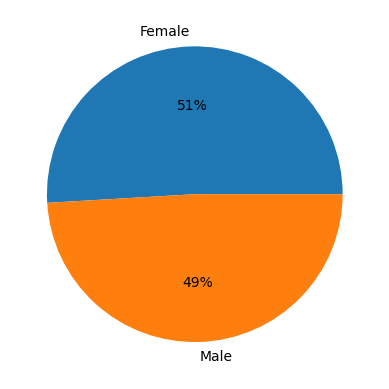

In [15]:
g = ['Female', 'Male']
plt.pie(df['gender'].value_counts(), autopct='%1.F%%', labels=g)
plt.show()

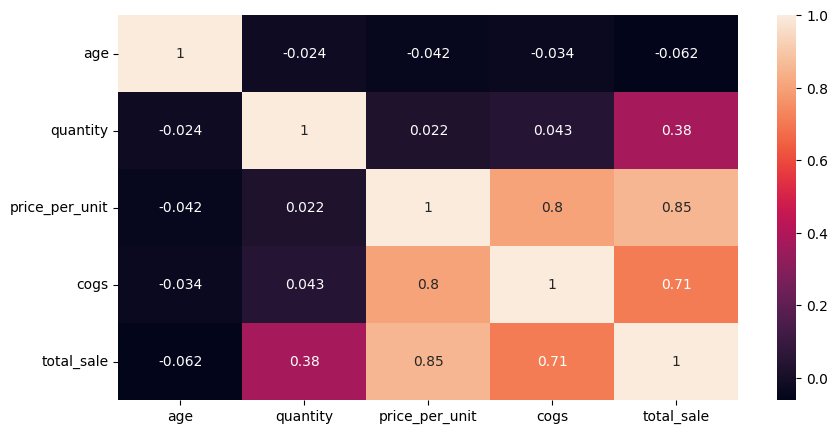

In [16]:
plt.figure(figsize=(10, 5))
sns.heatmap(num_col.corr(), annot=True)
plt.show()

**insights from heatmap**:
- if per unit price increases, then sale will increases.
- if more goods were sold, more sale will happen.

In [17]:
df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month
df['week'] = df['sale_date'].dt.isocalendar().week

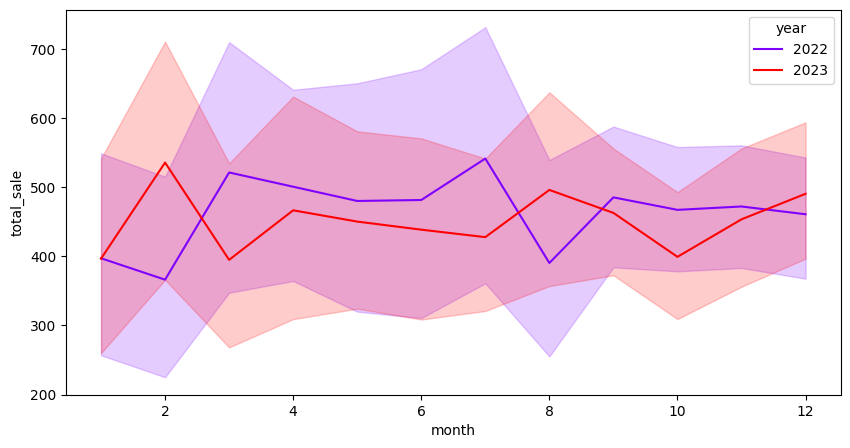

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='month', y='total_sale', hue='year', palette='rainbow')
plt.show()

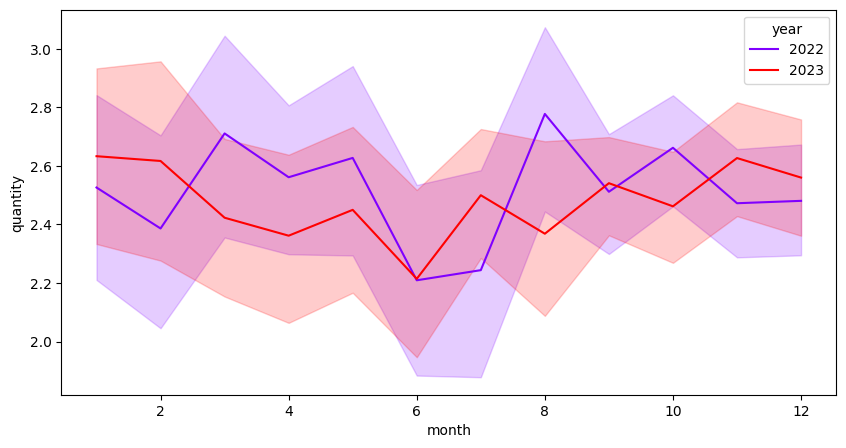

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='month', y='quantity', hue='year', palette='rainbow')
plt.show()

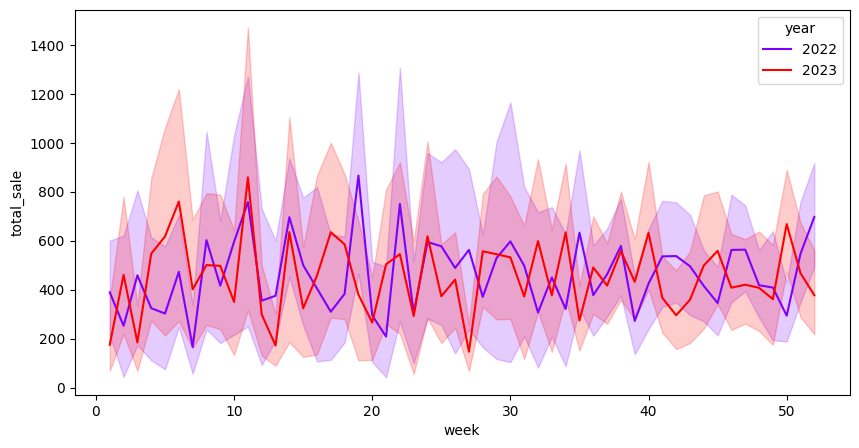

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='week', y='total_sale', hue='year', palette='rainbow')
plt.show()

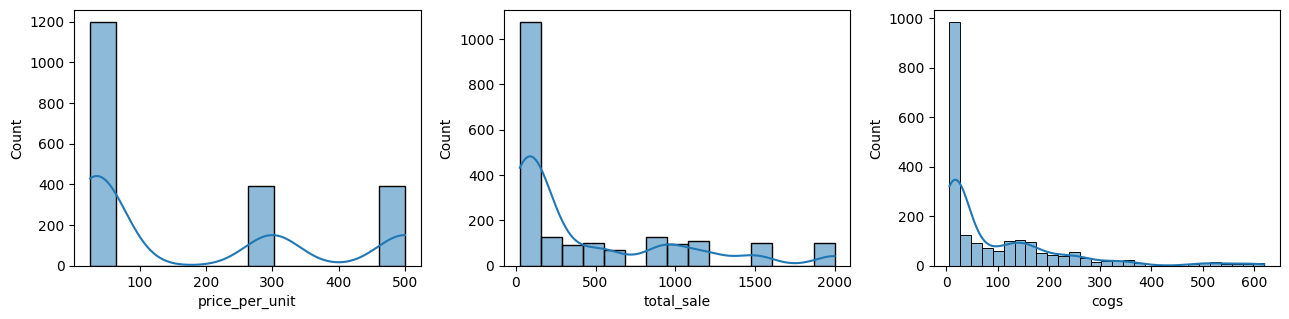

In [21]:
plt.figure(figsize=(13, 6))
plt.subplot(2, 3, 1)
sns.histplot(df['price_per_unit'], kde=True)
plt.subplot(2, 3, 2)
sns.histplot(df['total_sale'], kde=True, stat='count')
plt.subplot(2, 3, 3)
sns.histplot(df['cogs'], kde=True, stat='count')
plt.tight_layout()

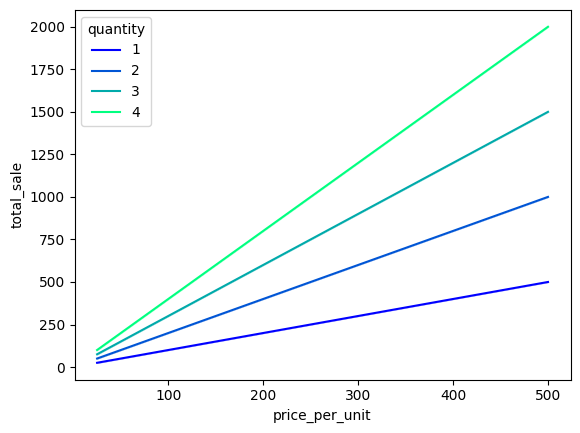

In [22]:
sns.lineplot(data=df, x='price_per_unit', y='total_sale', hue='quantity', palette='winter')
plt.show()

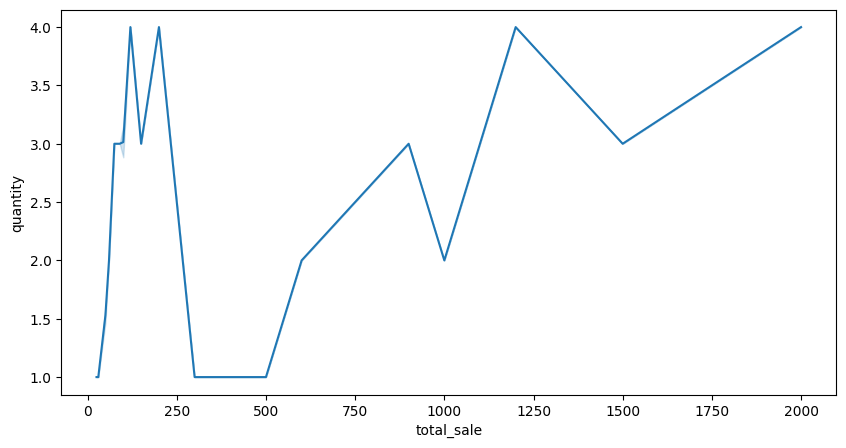

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='total_sale', y='quantity', palette='winter')
plt.show()

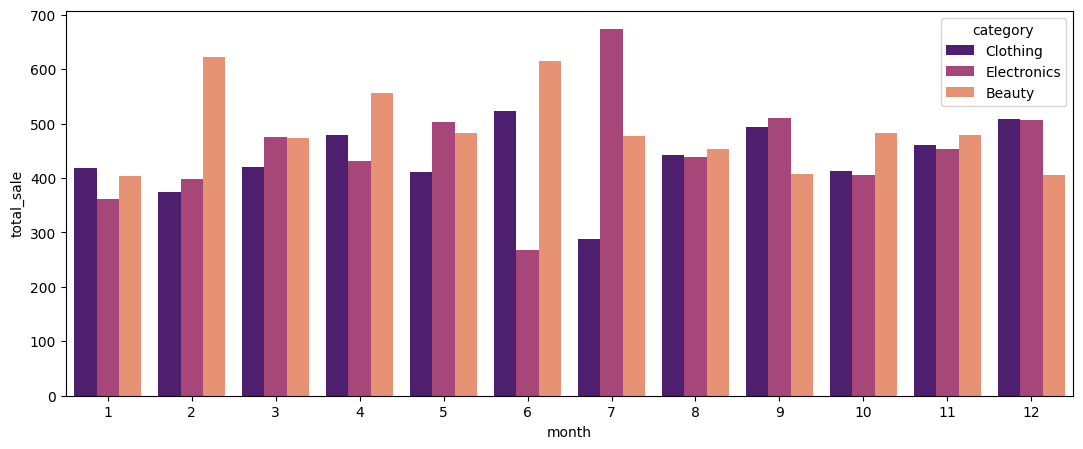

In [24]:
plt.figure(figsize=(13, 5))
sns.barplot(data=df, x='month', y='total_sale', hue='category', palette='magma', ci=None)
plt.show()

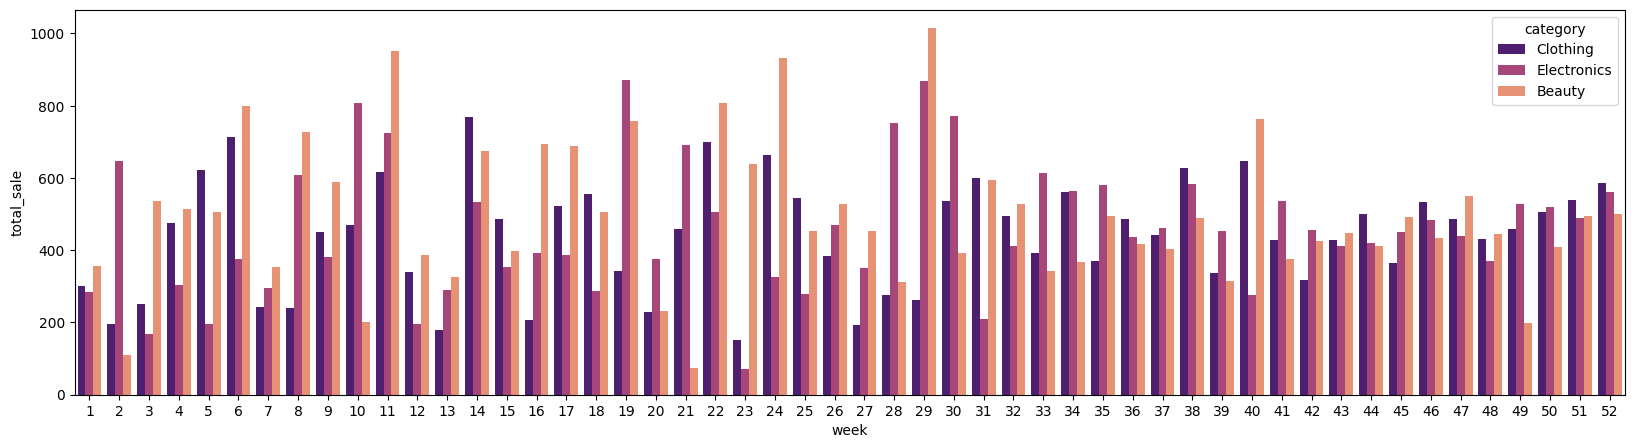

In [25]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df, x='week', y='total_sale', hue='category', palette='magma', ci=None)
plt.show()

In [26]:
group2 = df.groupby('category')[['quantity', 'total_sale']].sum().reset_index()
group2

,category,quantity,total_sale
0,Beauty,1533,286790.0
1,Clothing,1780,309995.0
2,Electronics,1682,311445.0


In [27]:
df['hour'] = pd.to_datetime(df['sale_time'], format='%H:%M:%S').dt.hour

<Axes: xlabel='hour'>

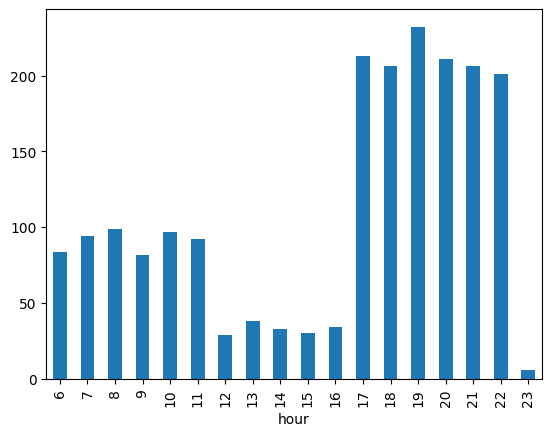

In [28]:
df['hour'].value_counts().sort_index().plot(kind='bar')

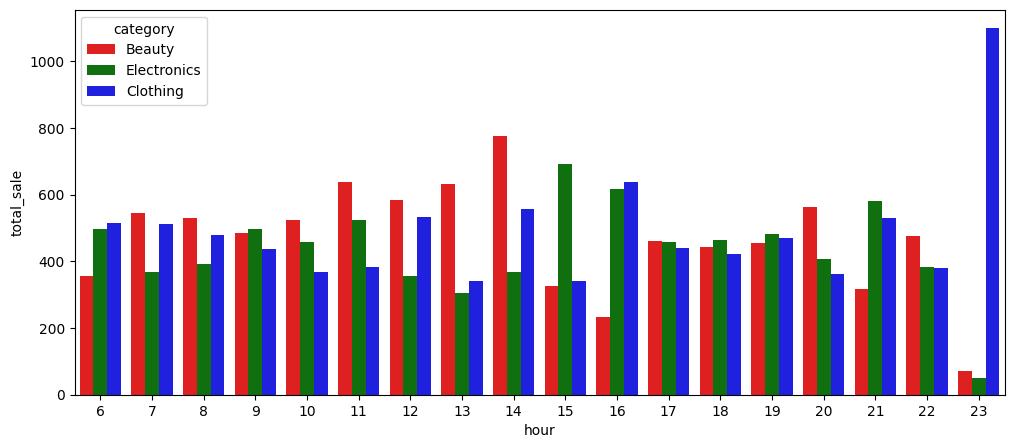

In [29]:
c = ['red', 'green', 'blue']
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='hour', y='total_sale', hue='category', ci=None, palette=c)
plt.show()

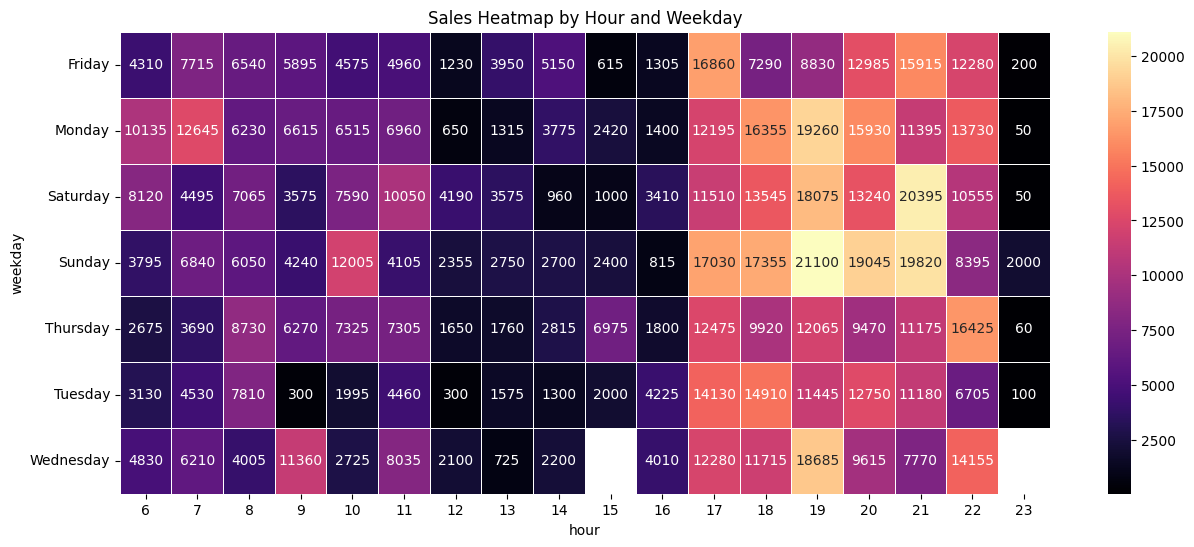

In [30]:
df['weekday'] = pd.to_datetime(df['sale_date']).dt.day_name()
pivot = df.groupby(['weekday', 'hour'])['total_sale'].sum().unstack()
plt.figure(figsize=(15, 6))
sns.heatmap(pivot, cmap='magma',annot=True, fmt=".0f", linewidths=0.5, linecolor='white')
plt.title('Sales Heatmap by Hour and Weekday')
plt.show()

### **Insights from analysis**:
- **monthly analysis**:
    - from month 1-6, beauty products got more sales.
    - electronics is the best performing category in july(7).
    - beauty & electronics both make more sales than clothing.
- **weekly analysis**:
    - from 0-20 weeks, sales reaching heights mostly in 2023.
    - from week 1 to 30, beauty products makes good sales.
    - clothing is stable and balanced accros the weeks.
    - more beauty sales in (6, 11, 14, 16, 17, 19, 24, 30) week.
- **quantity**:
    - more quantity sold means more sales.
- **category**:
    - female buys more beauty products than men.
    - for all category, female slightly shops more.
    - most of the sales are came from electronic products.
- **hourly analysis**:
    - people mostly shops after 5pm, they can be corporate workers.
    - sunday considered the best shop day.